# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Exploiratory Data Analysis

In [2]:
mnist = tf.keras.datasets.fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print("The number of train dataset:", x_train.shape)
print("The number of train dataset:", y_train.shape)
print("The number of train dataset:", x_test.shape)
print("The number of train dataset:", y_test.shape)

The number of train dataset: (60000, 28, 28)
The number of train dataset: (60000,)
The number of train dataset: (10000, 28, 28)
The number of train dataset: (10000,)


# Preprocessing

In [5]:
# Data Normalization

x_train, x_test = x_train/255.0, x_test/255.0

In [6]:
print('The maximum value of x_train is:', np.max(x_train))
print('The maximum value of x_test is:', np.max(x_test))

The maximum value of x_train is: 1.0
The maximum value of x_test is: 1.0


# Building the Model

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [8]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))           # Input layer
model.add(Dense(256, activation='relu'))          # First Hidden layer
model.add(Dense(128, activation='relu'))          # Second Hidden layer
model.add(Dense(10, activation='softmax'))        # Output layer

In [9]:
# Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Fitting train data to the model

records = model.fit(x_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

Epoch 1/10
4800/4800 [==============================] - 11s 2ms/step - loss: 0.4909 - accuracy: 0.8208 - val_loss: 0.4331 - val_accuracy: 0.8439
Epoch 2/10
4800/4800 [==============================] - 11s 2ms/step - loss: 0.3756 - accuracy: 0.8614 - val_loss: 0.4100 - val_accuracy: 0.8554
Epoch 3/10
4800/4800 [==============================] - 11s 2ms/step - loss: 0.3382 - accuracy: 0.8752 - val_loss: 0.3570 - val_accuracy: 0.8734
Epoch 4/10
4800/4800 [==============================] - 11s 2ms/step - loss: 0.3137 - accuracy: 0.8852 - val_loss: 0.3290 - val_accuracy: 0.8796
Epoch 5/10
4800/4800 [==============================] - 11s 2ms/step - loss: 0.2980 - accuracy: 0.8887 - val_loss: 0.3940 - val_accuracy: 0.8608
Epoch 6/10
4800/4800 [==============================] - 11s 2ms/step - loss: 0.2835 - accuracy: 0.8939 - val_loss: 0.3441 - val_accuracy: 0.8774
Epoch 7/10
4800/4800 [==============================] - 11s 2ms/step - loss: 0.2712 - accuracy: 0.8978 - val_loss: 0.3467 - val_ac

In [11]:
class_prediction = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [12]:
class_prediction

array([9, 2, 1, ..., 8, 1, 5])

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_test, class_prediction)

0.8732

Here the training accuracy is in the range of 90% while cross-validation and test accuricies are in the range of 88% and 87% respectively. So we may be overfitting our model to some extent. So lets check if we are overfitting our model using learning curves and confusion matrix.

# Learning Curves

In [15]:
records.history

{'loss': [0.49094387888908386,
  0.3755757510662079,
  0.3382014036178589,
  0.3136729896068573,
  0.29795289039611816,
  0.2834523916244507,
  0.2712203562259674,
  0.26368919014930725,
  0.2520831823348999,
  0.24557368457317352],
 'accuracy': [0.8207916617393494,
  0.8613958358764648,
  0.8752291798591614,
  0.8852291703224182,
  0.8886666893959045,
  0.893916666507721,
  0.8977916836738586,
  0.901562511920929,
  0.9050416946411133,
  0.909291684627533],
 'val_loss': [0.43311524391174316,
  0.4099785089492798,
  0.35700780153274536,
  0.32899072766304016,
  0.39395156502723694,
  0.3440743088722229,
  0.3466559946537018,
  0.3463072180747986,
  0.32903775572776794,
  0.351075142621994],
 'val_accuracy': [0.843916654586792,
  0.8554166555404663,
  0.8734166622161865,
  0.8795833587646484,
  0.8607500195503235,
  0.8774166703224182,
  0.8798333406448364,
  0.8810833096504211,
  0.8858333230018616,
  0.8829166889190674]}

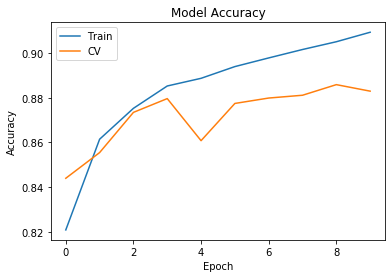

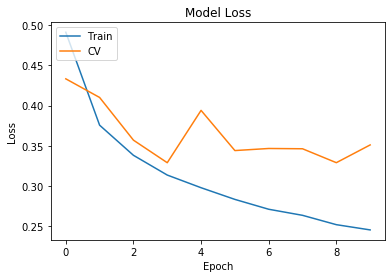

In [16]:
# Plot Model Accuracy

plt.plot(records.history['accuracy'])
plt.plot(records.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'CV'], loc='upper left')
plt.show()

# Plot Model Loss

plt.plot(records.history['loss'])
plt.plot(records.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'CV'], loc='upper left')
plt.show()

The Accuracy plot shows that although the accuracy of the training data is increasing, the accuracy of cross-validation data has been stuck to some value. Similarly the Loss plot shows that the loss of cross-validation data is stuck to some fixes value while that of training data is still decreasing. This means we are overfitting or model.

# Confusion Matrix

In [17]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [18]:
class_names = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0010037650>)

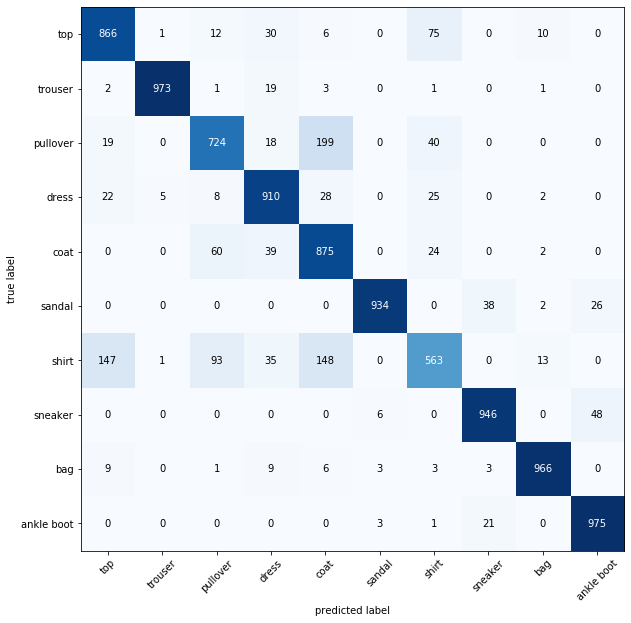

In [19]:
matrix = confusion_matrix(y_test, class_prediction)
plot_confusion_matrix(matrix, figsize=(10, 10), class_names=class_names)

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7effb81bb490>)

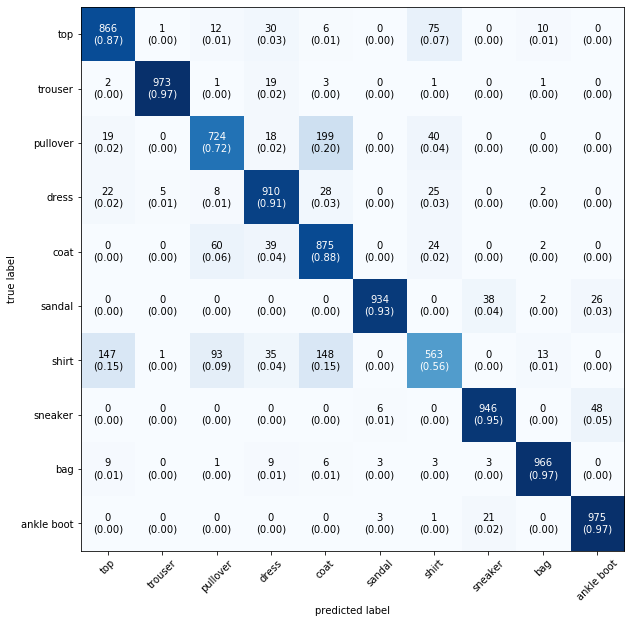

In [20]:
# Show accuracy for each shells

matrix = confusion_matrix(y_test, class_prediction)
plot_confusion_matrix(matrix, figsize=(10, 10), class_names=class_names, show_normed=True)

In [21]:
import matplotlib

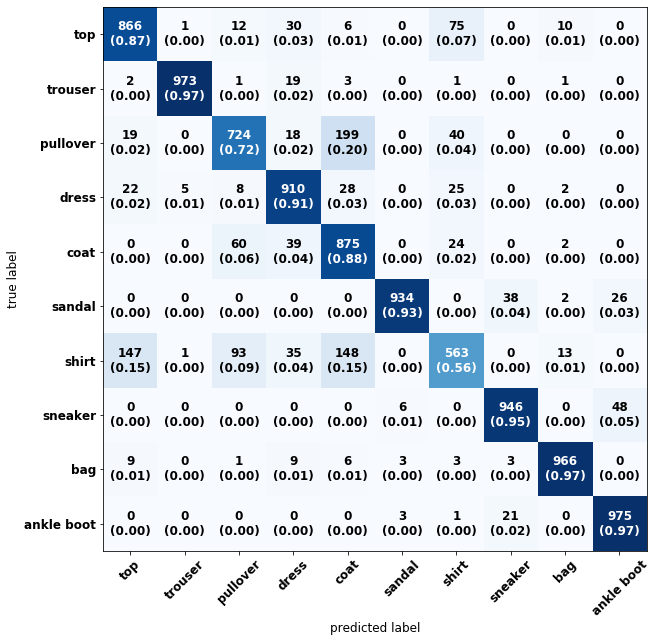

In [24]:
# Change the fonts

applied_font = {
    'family': 'Times New Roman',
    'weight': 'bold',
    'size': 12
}

matplotlib.rc('font', **applied_font)
matrix = confusion_matrix(y_test, class_prediction)
fig, ax = plot_confusion_matrix(matrix, figsize=(10, 10), class_names=class_names, show_normed=True)
fig.savefig('cm.png')      # saves the image to your root directory